# Prepare Data

## Data Set

In [ ]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

## Visualize Data

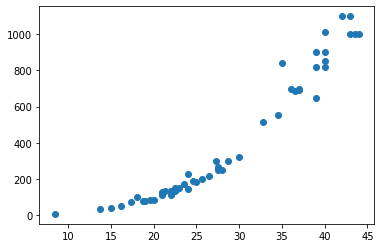

In [ ]:
import matplotlib.pyplot as plt

# object orientation
fig, ax = plt.subplots()
ax.scatter(perch_length, perch_weight)
ax.set_label("length")
ax.set_label("weight")
plt.show()

# KNN Regression
- low importance

## Split Data

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)
train_input.shape, test_input.shape, train_target.shape, test_target.shape

((42,), (14,), (42,), (14,))

In [ ]:
# change data set to two-dimensional array
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


## Model fitting

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

knr.fit(train_input, train_target)
knr.score(test_input, test_target) # Coefficient of Determination (R-squared)

0.992809406101064

## MAE
- Returns the average of absolute value errors between targets and predictions.

In [ ]:
from sklearn.metrics import mean_absolute_error
test_prediction = knr.predict(test_input)

In [ ]:
mae = mean_absolute_error(test_target, test_prediction)
print(mae) # On average, about 19.2 grams different from the target.

19.157142857142862


## Overfitting vs. Underfitting
- Overfitting:
  + Good prediction from training data and poor prediction from testing data
  + difficulty in finding and solving
- Underfitting:
  + Poor prediction from training data and good prediction from testing data
  + Or, poor prediction on both sides
  + The amount of data is small or the model is too simple.

In [ ]:
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9698823289099254
0.992809406101064


In [ ]:
# Set the number of neighbors to 3.
knr.n_neighbors = 3
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae) # On average, about 35.4 grams different from the target.

0.9804899950518966
0.9746459963987609
35.42380952380951


## Conclusion
1. k=5 : R^2= 0.99, MAE=19.2
2. k=3 : R^2= 0.97, MAE=35.4